# Single-Cell Electrophysiology Data

The Allen Cell Types dataset contains data recorded from cells using whole-cell patch clamp while injecting different current waveforms into the cells. It includes many pre-computed neuron metrics such as adaptation ratio, interspike interval, and spike rate, and intrinsic electrophysiology characteristics including resting membrane potential, rheobase, and more.

Single cell recording data is the simplest time series we can typically think of — it’s one vector of numbers, over time. In the notebook for this section, we’ll show how you can interact with single-cell recording data from the Allen Institute for Brain Science. This dataset contains data recorded from cells using whole-cell patch clamp while injecting different current waveforms into the cells. It includes many pre-computed neuron metrics such as adaptation ratio, interspike interval, and spike rate, and intrinsic electrophysiology characteristics including resting membrane potential, rheobase, and more.

### Learning objectives

After completing this lesson, you'll be able to:
* download single cell electophysiology data from the Allen Brain Cell Types Database
* access and plot pre-computed features
* parameterize an action potential with your own code
* plot the morphology of single cells
<hr>

## Setup

First, we'll import the packages we need, including the Allen SDK. If you don't have the allensdk installed, run `!pip install allensdk`. There is more information on installing the AllenSDK in the <a href="http://alleninstitute.github.io/AllenSDK/install.html">install guide</a>. We'll also import two specific things from the allenSDK: `CellTypesCache` and `CellTypesApi`.

In [1]:
import allensdk

# Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

# Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('Packages were successfully imported.')

Packages were successfully imported.


Next, we need to create a CellTypesCache object (`ctc`), and we'll initalize it with a manifest file.

In [3]:
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

## Get metadata about cells
The `get_cells()` method downloads metadata for cells in the database. The database contains human cells and mouse cells. By default, `get_cells()` downloads metadata for *all* cells in the database. Alternatively, you can filter the database to only include cells collected from a certain species.
Look through <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.cell_types_cache.html">the documentation for the CellTypesCache</a> for more information on the `get_cells` method.

In [7]:
# Download metadata for all cells in the database
all_cells = ctc.get_cells()

# Convert it to a dataframe with the cell id as the index
all_cells_df = pd.DataFrame(all_cells).set_index('id')

print('Number of cells:',len(all_cells_df))
all_cells_df.head()

Number of cells: 2333


,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,None,,563340157,left,0.582057
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,None,,319194354,right,0.469578
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,None,,605622695,right,NaN


## Get Electrophysiology Data

The `get_ephys_data()` method can download electrophysiology traces for a single cell in the database. This method returns a class instance with helper methods for retrieving stimulus and response traces out of an NWB file. If we take a look at `specimen_ephys_data` we can see that it is an NWBDataSet object.  In order to use `get_ephys_data()`, you must specify the id of the cell specimen whose electrophysiology you would like to download.

The source documentation for all the methods we cover can be found on the <a href = 'https://allensdk.readthedocs.io/en/latest/allensdk.core.nwb_data_set.html'> Allen Brain Atlas website</a>. The `get_experiment_sweep_numbers()` method returns all of the sweep numbers for experiments in the file. Each sweep contains metadata and electrophysiology data.

<mark>*Note*: This cell will take a few seconds to run.</mark>

In [28]:
# Get the cell_id for a cell in our dataframe
cell_id = all_cells_df.index[2]

# Get electrophysiological traces of our cell
specimen_ephys_data = ctc.get_ephys_data(specimen_id = cell_id)

# Retrieve sweep numbers for cell
sweep_numbers = specimen_ephys_data.get_experiment_sweep_numbers()

print(type(specimen_ephys_data))
print(sweep_numbers)

2022-10-13 12:22:57,468 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491200026


<class 'allensdk.core.nwb_data_set.NwbDataSet'>
[10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 6, 60, 64, 65, 66, 67, 69, 7, 70, 71, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 96, 97, 99]


Now that we have sweep numbers to choose from, we can take a look at a sweep's metadata by calling `get_sweep_metadata()`. This returns a dictionary containing information such as stimulus parameters and recording quality.

In [38]:
# Select a sweep number 
sweep_number = sweep_numbers[10]

# Retrieve metadata for selected sweep
specimen_metadata = specimen_ephys_data.get_sweep_metadata(sweep_number)
print(specimen_metadata)

{'aibs_stimulus_amplitude_pa': 560.0, 'aibs_stimulus_name': 'Short Square', 'gain': 0.01, 'initial_access_resistance': 17.857716, 'seal': 1.0445606}


/Users/ashley/anaconda3/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:386: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  sweep_metadata[field] = stim_details[field].value


The `get_sweep()` method returns a dictionary containing the stimulus, response, index_range, and sampling rate for a particular sweep.

In [39]:
sweep_data = specimen_ephys_data.get_sweep(sweep_number)
print(sweep_data)

{'stimulus': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'response': array([-0.07228125, -0.07234375, -0.07234375, ..., -0.07265625,
       -0.07271875, -0.0726875 ], dtype=float32), 'stimulus_unit': 'Amps', 'index_range': (150000, 404600), 'sampling_rate': 200000.0}


/Users/ashley/anaconda3/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:108: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  stimulus = stimulus_dataset.value
/Users/ashley/anaconda3/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:109: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  response = swp['response']['timeseries']['data'].value
/Users/ashley/anaconda3/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:125: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_idx_start = swp['stimulus']['idx_start'].value
/Users/ashley/anaconda3/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:126: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  swp_length = swp['stimulus']['count'].value
/Users/ashley/anaconda3/lib/python3.7/site-packages/allensdk/core/nwb_data_set.py:135: H5pyDeprecationWarning: dataset.value

Now that you've pulled down some data, chosen a cell, and chosen a sweep number, let's plot that data. We can look closer at the action potential by plotting the raw recording. Our `sweep_data` variable has all the data we need to plot our sweep; the stimulus current injected into our cell, the cell's response, and sampling rate of the sweep. 

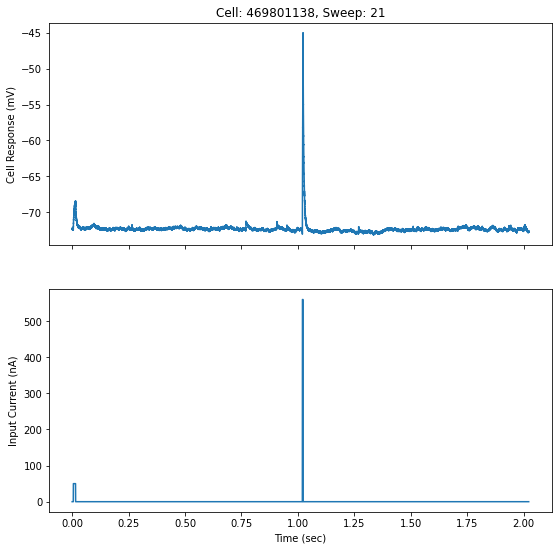

In [40]:
# Get the stimulus trace (in amps) and convert to pA
stim_current = sweep_data['stimulus'] * 1e12

# Get the voltage trace (in volts) and convert to mV
response_voltage = sweep_data['response'] * 1e3

# Get the sampling rate and can create a time axis for our data
sampling_rate = sweep_data['sampling_rate'] # in Hz
timestamps = (np.arange(0, len(response_voltage)) * (1.0 / sampling_rate))

fig, ax = plt.subplots(2, 1, sharex=True, figsize=(9,9))

ax[0].set_title('Cell: '+str(cell_id)+', Sweep: '+str(sweep_number))
ax[0].plot(timestamps, response_voltage)
ax[0].set_ylabel('Cell Response (mV)')
ax[1].plot(timestamps, stim_current)
ax[1].set_xlabel('Time (sec)')
ax[1].set_ylabel('Input Current (nA)')
#ax[1].set_xlim([2,2.2])

plt.show()

## Compute your own cell features